In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

sns.set(style="whitegrid")


In [2]:
import pandas as pd
df = pd.read_csv("german_credit_data_updated.csv")
df.head()



,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Credit Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,1
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,2
2,2,49,male,1,own,little,NaN,2096,12,education,1
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,4,53,male,2,free,little,little,4870,24,car,2


In [3]:
# Basic info
df.info()

# Check for null values
print("\nMissing values:\n", df.isnull().sum())

# Check class balance
print("\nTarget value counts:\n", df['Credit Risk'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        954 non-null    int64 
 1   Age               954 non-null    int64 
 2   Sex               954 non-null    object
 3   Job               954 non-null    int64 
 4   Housing           954 non-null    object
 5   Saving accounts   779 non-null    object
 6   Checking account  576 non-null    object
 7   Credit amount     954 non-null    int64 
 8   Duration          954 non-null    int64 
 9   Purpose           954 non-null    object
 10  Credit Risk       954 non-null    int64 
dtypes: int64(6), object(5)
memory usage: 82.1+ KB

Missing values:
 Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     175
Checking account    378
Credit amount         0
Duration              0
Purpose     

In [4]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

# Copy dataset
df_clean = df.copy()

# Fill missing values
df_clean.fillna(method='ffill', inplace=True)

# Label encode categorical columns
cat_cols = df_clean.select_dtypes(include='object').columns

le = LabelEncoder()
for col in cat_cols:
    df_clean[col] = le.fit_transform(df_clean[col])

# Confirm changes
df_clean.head()


C:\Users\qures\AppData\Local\Temp\ipykernel_4016\1195432252.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean.fillna(method='ffill', inplace=True)


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Credit Risk
0,0,67,1,2,1,4,0,1169,6,5,1
1,1,22,0,2,1,0,1,5951,48,5,2
2,2,49,1,1,1,0,1,2096,12,3,1
3,3,45,1,2,0,0,0,7882,42,4,1
4,4,53,1,2,0,0,0,4870,24,1,2


In [6]:
X = df_clean.drop('Credit Risk', axis=1)
y = df_clean['Credit Risk']


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])


Training samples: 763
Test samples: 191


In [9]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 0.7120418848167539

Classification Report:
               precision    recall  f1-score   support

           1       0.72      0.95      0.81       128
           2       0.68      0.24      0.35        63

    accuracy                           0.71       191
   macro avg       0.70      0.59      0.58       191
weighted avg       0.70      0.71      0.66       191



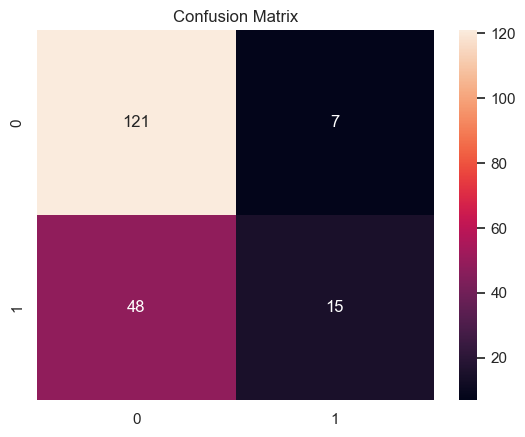

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()
